In [133]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import sympy as sy
from sympy.solvers import solve

In [134]:
# define the intersections of two lines
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [135]:
# discretization of triangle, generate the grid and mash in 2D plane
tolerance = 0.01

lambda1 = np.array([1./3., 1./3.])
lambda5 = np.array([0.5 - 0.5*tolerance, 0.5 - 0.5*tolerance])
lambda15 = [1.0 - 2*tolerance, tolerance]

lambda2 = lambda1 + 0.25 * (lambda5 - lambda1)
lambda3 = lambda1 + 0.50 * (lambda5 - lambda1)
lambda4 = lambda1 + 0.75 * (lambda5 - lambda1)
lambda6 = lambda1 + 0.25 * (lambda15 - lambda1)
lambda9 = lambda5 + 0.25 * (lambda15 - lambda5)
lambda10 = lambda1 + 0.50 * (lambda15 - lambda1)
lambda12 = lambda5 + 0.50 * (lambda15 - lambda5)
lambda13 = lambda1 + 0.75 * (lambda15 - lambda1)
lambda14 = lambda5 + 0.75 * (lambda15 - lambda5)

lambda7 = np.array(line_intersection((lambda2,lambda14),(lambda3,lambda10)))
lambda8 = np.array(line_intersection((lambda4,lambda13),(lambda3,lambda12)))
lambda11 = np.array(line_intersection((lambda2,lambda14),(lambda4,lambda13)))

tri_domain = (lambda5, lambda1, lambda15)
z_points = [0.10, 0.14, 0.18]
difference = z_points[2]-z_points[0]

In [136]:
# create a dictionary for nodes
nodes = {'lambda1':lambda1,
        'lambda2':lambda2,
        'lambda3':lambda3,
        'lambda4':lambda4,
        'lambda5':lambda5,
        'lambda6':lambda6,
        'lambda7':lambda7,
        'lambda8':lambda8,
        'lambda9':lambda9,
        'lambda10':lambda10,
        'lambda11':lambda11,
        'lambda12':lambda12,
        'lambda13':lambda13,
        'lambda14':lambda14,
        'lambda15':lambda15}

key, coor = zip(*nodes.items())

In [137]:
# create and add triangles into a list
triangles=[]

triangles.append((lambda2,lambda1,lambda6))
triangles.append((lambda2,lambda6,lambda7))
triangles.append((lambda3,lambda2,lambda7))
triangles.append((lambda3,lambda7,lambda8))
triangles.append((lambda4,lambda3,lambda8))
triangles.append((lambda4,lambda8,lambda9))
triangles.append((lambda5,lambda4,lambda9))
triangles.append((lambda7,lambda6,lambda10))
triangles.append((lambda7,lambda10,lambda11))
triangles.append((lambda8,lambda7,lambda11))
triangles.append((lambda8,lambda11,lambda12))
triangles.append((lambda9,lambda8,lambda12))
triangles.append((lambda11,lambda10,lambda13))
triangles.append((lambda11,lambda13,lambda14))
triangles.append((lambda12,lambda11,lambda14))
triangles.append((lambda14,lambda13,lambda15))

<ipython-input-138-558a33a0e86d>:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3d.set_xticklabels(xlabels, fontsize=7)
<ipython-input-138-558a33a0e86d>:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3d.set_yticklabels(ylabels, fontsize=7)
<ipython-input-138-558a33a0e86d>:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3d.set_zticklabels(zlabels, fontsize=7.5)


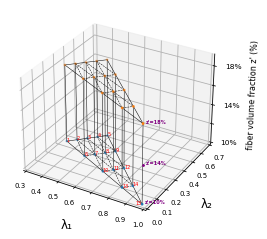

In [138]:
# plot and visualization

# generate points 
x_points = []
y_points = []

for i in range(0,len(coor)):
    x_points.append(coor[i][0])
    y_points.append(coor[i][1])
    
x_points = np.array(x_points)
y_points = np.array(y_points)
z1 = np.full(shape=len(x_points), fill_value=z_points[0])
z2 = np.full(shape=len(x_points), fill_value=z_points[2])

fig_3d = plt.figure()
ax_3d = plt.axes(projection='3d')
ax_3d.scatter3D(x_points, y_points, z1, s=3)
ax_3d.scatter3D(x_points, y_points, z2, s=3)
ax_3d.scatter3D(lambda15[0], lambda15[1], 0.14, color='purple', s=3)

# annotate 2D grid
ax_3d.text(lambda1[0],lambda1[1], z_points[0], "1", color='red',size=5)
ax_3d.text(lambda2[0],lambda2[1], z_points[0], "2", color='red',size=5)
ax_3d.text(lambda3[0],lambda3[1], z_points[0], "3", color='red',size=5)
ax_3d.text(lambda4[0],lambda4[1], z_points[0], "4", color='red',size=5)
ax_3d.text(lambda5[0],lambda5[1], z_points[0], "5", color='red',size=5)
ax_3d.text(lambda6[0],lambda6[1], z_points[0], "6", color='red',size=5)
ax_3d.text(lambda7[0],lambda7[1], z_points[0], "7", color='red',size=5)
ax_3d.text(lambda8[0],lambda8[1], z_points[0], "8", color='red',size=5)
ax_3d.text(lambda9[0],lambda9[1], z_points[0], "9", color='red',size=5)
ax_3d.text(lambda10[0],lambda10[1], z_points[0], "10", color='red',size=5)
ax_3d.text(lambda11[0],lambda11[1], z_points[0], "11", color='red',size=5)
ax_3d.text(lambda12[0],lambda12[1], z_points[0], "12", color='red',size=5)
ax_3d.text(lambda13[0],lambda13[1], z_points[0], "13", color='red',size=5)
ax_3d.text(lambda14[0],lambda14[1], z_points[0], "14", color='red',size=5)
ax_3d.text(lambda15[0],lambda15[1], z_points[0], "15", color='red',size=5, horizontalalignment='right')

# annotate three layers
ax_3d.text(lambda15[0]+0.01,lambda15[1]+0.01, z_points[0], '''z'=10%''', color='purple',size=5, weight='bold')
ax_3d.text(lambda15[0]+0.01,lambda15[1]+0.01, z_points[1], '''z'=14%''', color='purple',size=5, weight='bold')
ax_3d.text(lambda15[0]+0.01,lambda15[1]+0.01, z_points[2], '''z'=18%''', color='purple',size=5, weight='bold')

# generate lines
ax_3d.plot([lambda1[0], lambda15[0]], [lambda1[1], lambda15[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'solid')
ax_3d.plot([lambda2[0], lambda14[0]], [lambda2[1], lambda14[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda3[0], lambda12[0]], [lambda3[1], lambda12[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda4[0], lambda9[0]], [lambda4[1], lambda9[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda1[0], lambda5[0]], [lambda1[1], lambda5[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'solid')
ax_3d.plot([lambda6[0], lambda9[0]], [lambda6[1], lambda9[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda10[0], lambda12[0]], [lambda10[1], lambda12[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda13[0], lambda14[0]], [lambda13[1], lambda14[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda2[0], lambda6[0]], [lambda2[1], lambda6[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda3[0], lambda10[0]], [lambda3[1], lambda10[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda4[0], lambda13[0]], [lambda4[1], lambda13[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda5[0], lambda15[0]], [lambda5[1], lambda15[1]], z_points[0], color = 'k', linewidth = 0.5, linestyle = 'solid')

ax_3d.plot([lambda1[0], lambda15[0]], [lambda1[1], lambda15[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'solid')
ax_3d.plot([lambda2[0], lambda14[0]], [lambda2[1], lambda14[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda3[0], lambda12[0]], [lambda3[1], lambda12[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda4[0], lambda9[0]], [lambda4[1], lambda9[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda1[0], lambda5[0]], [lambda1[1], lambda5[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'solid')
ax_3d.plot([lambda6[0], lambda9[0]], [lambda6[1], lambda9[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda10[0], lambda12[0]], [lambda10[1], lambda12[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda13[0], lambda14[0]], [lambda13[1], lambda14[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda2[0], lambda6[0]], [lambda2[1], lambda6[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda3[0], lambda10[0]], [lambda3[1], lambda10[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda4[0], lambda13[0]], [lambda4[1], lambda13[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax_3d.plot([lambda5[0], lambda15[0]], [lambda5[1], lambda15[1]], z_points[2], color = 'k', linewidth = 0.5, linestyle = 'solid')

# connection of upper and bottom planes
from_pts = []
for ea in np.stack((x_points, y_points, z1), axis=-1):
    from_pts.append(ea)

dest_pts = []
for ea2 in np.stack((x_points, y_points, z2), axis=-1):
    dest_pts.append(ea2)
    
for from_to in zip(from_pts, dest_pts):
    ax_3d.plot([from_to[0][0],from_to[1][0]], 
               [from_to[0][1],from_to[1][1]], 
               [from_to[0][2],from_to[1][2]], "k", linewidth=0.5)

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
ax_3d.set_xlabel('λ1'.translate(subscript), fontsize=12)
ax_3d.set_ylabel('λ2'.translate(subscript), fontsize=12)
ax_3d.set_zlabel('''fiber volume fraction z' (%)''', fontsize=8)
ax_3d.set_xlim3d(0.3,1)
ax_3d.set_ylim3d(0,0.7)
ax_3d.set_zlim3d(z_points[0],z_points[2]+0.01)

# set ticks
xlabels = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
ax_3d.set_xticklabels(xlabels, fontsize=7)
ax_3d.tick_params(axis='x', which='major', pad=0.5)

ylabels = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
ax_3d.set_yticklabels(ylabels, fontsize=7)
ax_3d.tick_params(axis='y', which='major', pad=1)

zlabels = [item.get_text() for item in ax_3d.get_zticklabels()]
zlabels[0] = '10%'
zlabels[2] = '14%'
zlabels[4] = '18%'
ax_3d.set_zticklabels(zlabels, fontsize=7.5)

fig_3d.savefig('3D_Space.png', dpi=200, bbox_inches='tight')